# Machine Learning
## Assignment 1
### Morgan Reilly -- 20235398

## References:
* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tutorial-setup
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

## Imports

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import csv

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn import tree

## Text Processing

* Create csv file from text file
* Read in text file and transpose to csv
* Do this for both test and train data

#### CSV Generation

In [2]:
"""
Read CSV
    Load csv from disk, pass in output location
    Convert to CSV and return
"""
def read_csv(file_in, file_out):
    data = pd.read_csv(file_in, sep="\t", header=None)
    data.columns = ['calorific_value', 'nitrogen', 'turbidity',
                        'style', 'alcohol', 'sugars', 'bitterness',
                        'beer_id', 'colour', 'degree_of_fermentation']
    data.to_csv(file_out, index = None)
    data = pd.read_csv(file_out)
    return data

#### Training Data

In [3]:
# Read in and store training data as datafram
training_data = read_csv("data/beer_training.txt", "data/beer_training.csv")
training_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,41.638096,0.322277,1.858922,3.998486,17.365645,8.935387,90.032258,11.321226,67.143733
std,2.623812,0.135035,0.891977,0.250500,1.113639,3.419934,50.833370,2.842828,5.862946
min,37.075221,0.107013,0.290909,3.393846,15.740000,2.730211,1.000000,5.760000,53.668571
25%,38.966814,0.215891,1.192727,3.801538,16.560000,6.140829,44.500000,9.000000,63.336071
50%,41.809735,0.290150,1.720000,4.015385,16.900000,9.436842,94.500000,11.520000,66.663571
75%,44.022124,0.405223,2.373409,4.219231,18.150000,11.476408,133.500000,13.230000,70.733929
max,45.836283,0.742774,4.255455,4.427692,20.650000,20.063789,177.000000,20.520000,87.238571


#### Test Data

In [4]:
# Read in and store test data as data-frame
test_data = read_csv("data/beer_test.txt", "data/beer_test.csv")
test_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,41.722714,0.315067,1.993182,4.037641,17.213000,8.463911,91.733333,11.408000,61.087095
std,2.616999,0.106278,1.063155,0.246711,1.140551,3.035596,51.831247,2.599807,11.134063
min,37.296460,0.156837,0.689091,3.526154,15.900000,2.924895,4.000000,6.840000,37.034286
25%,39.973451,0.237648,1.345227,3.879231,16.647500,6.341276,54.500000,9.390000,53.237143
50%,41.522124,0.271882,1.771818,4.033846,16.730000,7.855421,87.000000,11.760000,59.157143
75%,43.977876,0.395544,2.252500,4.173846,17.752500,10.727566,131.750000,13.350000,73.330000
max,45.880531,0.525512,5.217273,4.563077,20.510000,13.456368,178.000000,15.360000,79.134286


In [5]:
training_data.count()

calorific_value           124
nitrogen                  124
turbidity                 124
style                     124
alcohol                   124
sugars                    124
bitterness                124
beer_id                   124
colour                    124
degree_of_fermentation    124
dtype: int64

In [6]:
test_data.count()

calorific_value           30
nitrogen                  30
turbidity                 30
style                     30
alcohol                   30
sugars                    30
bitterness                30
beer_id                   30
colour                    30
degree_of_fermentation    30
dtype: int64

## Classification

In [7]:
"""
Generate Samples
    Takes a pandas data frame
    Strips the labels
    Returns list
"""
def gen_samples(df):
    n_samples = []
    for col, row in df.iterrows():
        rows = [row[0], row[1], row[2], row[4], row[5], 
            row[6], row[7], row[8], row[9]]
        n_samples.append(rows)
    return n_samples

"""
Feature Generation
    Takes pandas data frame
    Isolates clasifing label (in this case: style)
    returns list
"""
def gen_features(df):
    n_features = []
    for col in df['style']:
        n_features.append(col)
    return n_features

### Generate features set and sample set of:
    * Training Data
    * Test Data

In [8]:
# Training Data
n_train_samples = gen_samples(training_data)
n_train_features = gen_features(training_data)

# Test Data
n_test_samples = gen_samples(test_data)
n_test_features = gen_features(test_data)

#### Set X, y
    X: Samples
    y: Features

In [9]:
# Training Set
X_train = n_train_samples
y_train = n_train_features

# Testing Set
X_test = n_test_samples
y_test = n_test_features

## Model
### Training & Testing
### Type: Decision Tree Classifier

* Here I fit the model to a decision tree classifier
* I train the model on the training data, predicit the output and then evaluate the score

TODO: Desscribe the CART algorithm in some detail here to bulk up the report and explain why it's used rather than the CR3.? algorithm

In [10]:
# Fit model to training data
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [11]:
# Generate prediction score from training data 
train_predictions = model.predict(X_train)
# print(train_predictions)
train_score = model.score(X_train, y_train)
print(f"Training Score: {train_score}%")

Training Score: 1.0%


In [12]:
# Generate prediction score from testing data
test_predictions = model.predict(X_test)
# print(test_predictions)
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}%")

Test Score: 0.8666666666666667%


In [13]:
# Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train[:30], y_test)
print(f"Accuracy: {acc}%")

Accuracy: 0.3333333333333333%


In [14]:
# Cross Validation - Train
cross_validate(model, X_train, y_train)

{'fit_time': array([0.00069356, 0.00056481, 0.0005002 , 0.00068665, 0.00051117]),
 'score_time': array([0.00029826, 0.00023675, 0.00027204, 0.00023127, 0.00023198]),
 'test_score': array([1.  , 1.  , 0.84, 0.96, 0.75])}

In [15]:
# Cross Validation - Test
cross_validate(model, X_test, y_test)

{'fit_time': array([0.00033259, 0.00028372, 0.00027299, 0.00027227, 0.00027156]),
 'score_time': array([0.00030661, 0.00019526, 0.00019288, 0.00020194, 0.00019073]),
 'test_score': array([0.83333333, 1.        , 0.83333333, 0.83333333, 0.83333333])}

[Text(181.35000000000002, 199.32, 'X[1] <= 0.36\ngini = 0.665\nsamples = 124\nvalue = [42, 44, 38]'),
 Text(111.60000000000001, 163.07999999999998, 'X[7] <= 9.42\ngini = 0.552\nsamples = 84\nvalue = [5, 42, 37]'),
 Text(55.800000000000004, 126.83999999999999, 'X[5] <= 9.667\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(27.900000000000002, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 3.934\ngini = 0.34\nsamples = 50\nvalue = [5, 40, 5]'),
 Text(139.5, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(195.3, 90.6, 'X[5] <= 8.714\ngini = 0.651\nsamples = 13\nvalue = [5, 3, 5]'),
 Text(139.5, 54.359999999999985, 'X[7] <= 11.64\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(25

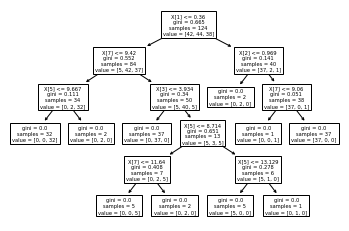

In [16]:
tree.plot_tree(model)

## Model
### Training & Testing
### Type: Decision Tree Classifier

* Here I fit the model to a Random Forest Classifier
* This is done in a similar method to the Decision Tree Classifier as shown above

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(X_train, y_train)

In [18]:
# Generate prediction score from training data 
rfc_train_predictions = rfc.predict(X_train)
# print(train_predictions)
rfc_train_score = rfc.score(X_train, y_train)
print(f"Training Score: {rfc_train_score}%")

Training Score: 0.9919354838709677%


In [19]:
# Generate prediction score from testing data
rfc_test_predictions = rfc.predict(X_test)
# print(test_predictions)
rfc_test_score = model.score(X_test, y_test)
print(f"Test Score: {rfc_test_score}%")

Test Score: 0.8666666666666667%


In [20]:
# Cross Validation - Train
cross_validate(rfc, X_train, y_train)

{'fit_time': array([0.00890517, 0.00850654, 0.00878143, 0.00857091, 0.00944567]),
 'score_time': array([0.00098324, 0.00099206, 0.00100994, 0.00108123, 0.00096273]),
 'test_score': array([0.92      , 0.96      , 0.92      , 0.96      , 0.83333333])}

In [21]:
# Cross Validation - Test
cross_validate(rfc, X_test, y_test)

{'fit_time': array([0.00816011, 0.00785375, 0.00823092, 0.00810003, 0.00838304]),
 'score_time': array([0.00093007, 0.00107312, 0.00094438, 0.00098777, 0.00094533]),
 'test_score': array([0.83333333, 1.        , 1.        , 1.        , 1.        ])}